In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

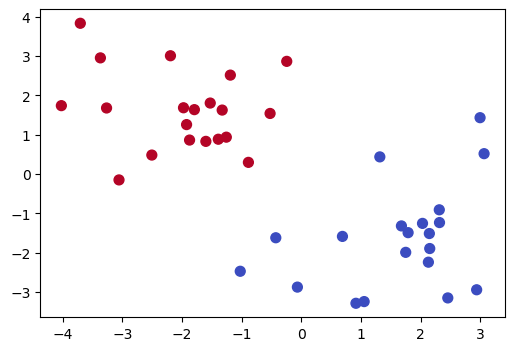

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

In [5]:
data1.head()

,x1,x2,y,Unnamed: 3
0,2.315039,-0.908103,0,NaN
1,1.752127,-1.988405,0,NaN
2,2.154953,-1.891813,0,NaN
3,-0.064261,-2.871490,0,NaN
4,-0.426275,-1.618110,0,NaN


#### a. Report the separating hyperplane (line).

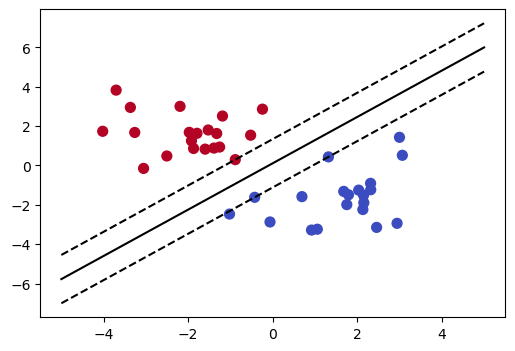

separating hyperplane: y=1.1774373623419114x-0.11181536076015833


In [27]:
# your code here
from sklearn import svm
import pylab as pl
x_train = data1[['x1','x2']]
y_train = data1['y']
predictor = svm.SVC(gamma='scale', C=100000, decision_function_shape='ovr',kernel='linear')
# 进行训练
predictor.fit(x_train, y_train)
w = predictor.coef_[0]
a = -w[0] / w[1] # 斜率
xx = np.linspace(-5, 5) # 在区间[-5, 5] 中产生连续的值，用于画线
yy = a * xx - (predictor.intercept_[0]) / w[1]

b1 = predictor.support_vectors_[0] # 第一个分类的支持向量
yy_down = a * xx + (b1[1] - a * b1[0])

b2 = predictor.support_vectors_[-1] # 第二个分类中的支持向量
yy_up = a * xx + (b2[1] - a * b2[0])

pl.plot(xx, yy, 'k-')
pl.plot(xx, yy_down, 'k--')
pl.plot(xx, yy_up, 'k--')
# pl.scatter(predictor.support_vectors_[:, 0], predictor.support_vectors_[:, 1],
#            s=80, facecolors='none')
# pl.scatter(X[:, 0], X[:, 1], c=Y, cmap=pl.cm.Paired)
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
pl.axis('tight')
pl.show()
print('separating hyperplane: y={}x{}'.format(a,((predictor.intercept_[0]) / w[1])))

#### b. List the support vectors.

In [22]:
# your code here
print(predictor.support_vectors_)

[[-0.42627536 -1.61810965]
 [ 1.3180363   0.43600617]
 [-0.88564585  0.2969359 ]]


#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

In [31]:
# your code here
print('upper hyperplane: y={}x+{}'.format(a,(b2[1] - a * b2[0])))
print('lower hyperplane: y={}x{}'.format(a,(b1[1] - a * b1[0])))

upper hyperplane: y=1.1774373623419114x+1.3397284161253722
lower hyperplane: y=1.1774373623419114x-1.116197106957939


#### d. Compute the width of the margin.

In [35]:
# your code here
import math
width_margin = abs((b2[1] - a * b2[0])-(b1[1] - a * b1[0]))/math.sqrt(2 * (a ** 2))
width_margin

1.4748993424221266

#### e. What would you expect to happen to the margin if the constant C was made very small?

Your answer here.  You can justify your intuitions with code if you'd like, but this is not required.

If constant C is small, I think the margin would become wider than now, since the punish of soft margin is reduce, it will allow more spot in between the upper and lower hyperplane

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following questions:

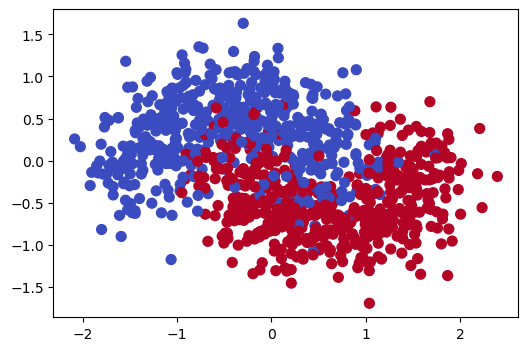

In [37]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [42]:
# your code here
predictor1 = svm.SVC(kernel='poly')
predictor1.fit(X_train, Y_train)
correct_in = 1.0*(predictor1.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)
correct_out = 1.0*(predictor1.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print('in-sample classification accuracy= ',correct_in)
print('out-of-sample classification accuracy= ',correct_out)

in-sample classification accuracy=  0.8328358208955224
out-of-sample classification accuracy=  0.8575757575757575


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


For degree = 1


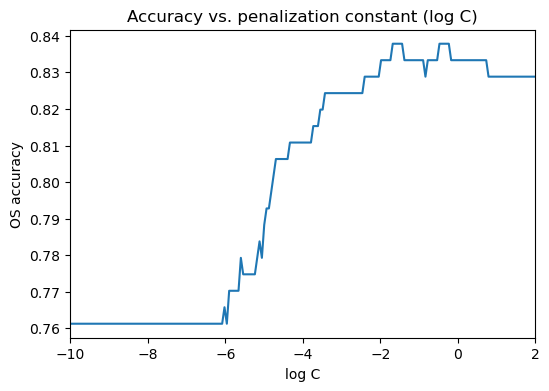

For degree = 2


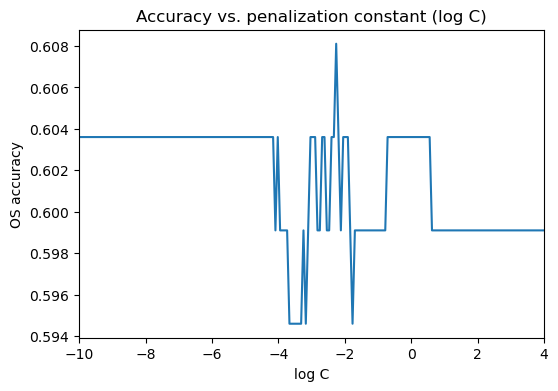

For degree = 3


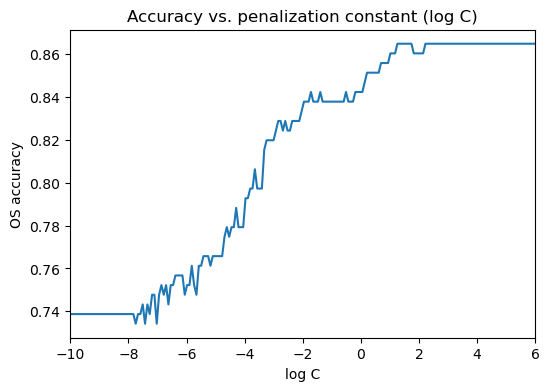

For degree = 4


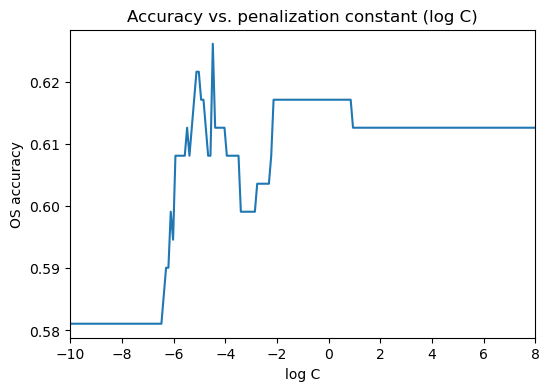

In [53]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)
for degreeNo in [1,2,3,4]:
    OS = []
    for i in np.linspace(-10,2*degreeNo,200):
        c = math.exp(i)
        predictor2 = svm.SVC(kernel='poly',C = c,degree = degreeNo)
        predictor2.fit(X_train_1, Y_train_1)
        correct_out = 1.0*(predictor2.predict(X_vali) == np.asarray(Y_vali)).sum()/len(Y_vali)
        OS.append(correct_out)
    print('For degree =',degreeNo)
    plt.gca()
    plt.plot(np.linspace(-10,2*degreeNo,200),OS)
    plt.xlabel("log C")
    plt.ylabel("OS accuracy")
    plt.title("Accuracy vs. penalization constant (log C)")
    plt.xlim(-10,2*degreeNo)
    plt.show()
# your code here

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [56]:
# your code here
predictor3 = svm.SVC(kernel='poly',C = math.exp(4),degree = 3)
predictor3.fit(X_train_1, Y_train_1)
correct_out = 1.0*(predictor3.predict(X_vali) == np.asarray(Y_vali)).sum()/len(Y_vali)
print('out-of-sample classification accuracy= ',correct_out)

out-of-sample classification accuracy=  0.8648648648648649


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

SUV,red,imported,yes

sports,yellow,domestic,no

sports,red,imported,no

SUV,red,domestic,yes

SUV,red,imported,yes

sports,yellow,domestic,no

SUV,red,imported,yes

SUV,yellow,domestic,yes

sports,yellow,imported,no

sports,red,imported,yes


### Questions:

a) Calculate the following sample probabilities:

P(Yes) = 7/11

P(No) = 4/11

P(Red|Yes) = 6/7

P(SUV|Yes) = 5/7

P(Domestic|Yes) = 3/7

P(Red|No) = 1/4

P(SUV|No) = 0

P(Domestic|No) = 1/2

b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.
#####  P(Yes|red & domestic & SUV) = P(Yes & red & domestic & SUV)  /  P(red & domestic & SUV)
#####  = P(Yes)P(red & domestic & SUV | Yes)  /  [P(Yes)P(red & domestic & SUV |Yes)+P(No)P(red & domestic & SUV |No)]
#####  = P(Yes)P(red |Yes)P(domestic |Yes)P(SUV |Yes)  /  P(Yes)P(red | Yes)P(domestic |Yes)P(SUV |Yes) + P(No)P(red | No)P(domestic | No)P(SUV | No)
#####  = (7/11 * 6/7 * 3/7 * 5/7)  /  [(7/11 * 6/7 * 3/7 * 5/7) + (4/11 * 1/4 * 1/2 * 0)]
#####  =1

## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if the monthly rent of an apartment in Brazil is lower than $600 or not. The variables are:

y: The label (1 - rent is lower than 600 USD, 0 - rent is higher or equal to 600 USD)

city: Apartment location (1 - city, 0 - otherwise)

area: Code number for each area

rooms: Number of rooms

bathroom: Number of bathrooms

parking_spaces: Number of parking spaces

floor: Apartment floor

animal: 1 - if animals are allowed, 0 - if animals are not allowed 

furniture: 1 - if apartment is furnished, 0 - if apartment is unfurnished 

Original dataset "brazilian_houses_to_rent" available in: https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent.

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [101]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print(data_train.head())
print(X_train.head())
print(y_train.head())

   Label  y  city  area  rooms  bathroom  parking_spaces  floor  animal  \
0      0  0     1   240      3         3               4      0       1   
1      1  1     0    64      2         1               1     10       1   
2      2  0     1   443      5         5               4      3       1   
3      3  1     1    73      2         2               1     12       1   
4      4  1     1    19      1         1               0      0       0   

   furniture  
0          1  
1          0  
2          1  
3          0  
4          0  
   city  area  rooms  bathroom  parking_spaces  floor  animal  furniture
0     1   240      3         3               4      0       1          1
1     0    64      2         1               1     10       1          0
2     1   443      5         5               4      3       1          1
3     1    73      2         2               1     12       1          0
4     1    19      1         1               0      0       0          0
0    0
1    1
2    0


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [102]:
# your code here
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
trained_model = gnb.fit(X_train,y_train)
y_pred_train = trained_model.predict_proba(X_train)[:,1]
y_pred_test = trained_model.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',gnb.score(X_train,y_train))
print('Out of sample prediction accuracy:',gnb.score(X_test,y_test))

In sample prediction accuracy: 0.8137254901960784
Out of sample prediction accuracy: 0.7996070726915521


### b) What is the prior probability of "rent lower than 600 USD", learned from the training data?

In [103]:
# your code here
P_lower_600_prior = sum(y_train) / len(y_train)
P_lower_600_prior

0.5049019607843137

### c) What is the mean and variance of of each input for apartments with rent lower than 600 USD?

In [104]:
# your code here
apartment_lower_600 = data_train[(data_train['y'] == 1)]
print('mean of city with rent lower than 600 USD: ',np.mean(apartment_lower_600['city']))
print('mean of area with rent lower than 600 USD do not exist')
print('mean of rooms with rent lower than 600 USD: ',np.mean(apartment_lower_600['rooms']))
print('mean of bathroom with rent lower than 600 USD: ',np.mean(apartment_lower_600['bathroom']))
print('mean of parking_spaces with rent lower than 600 USD: ',np.mean(apartment_lower_600['parking_spaces']))
print('mean of floor with rent lower than 600 USD: ',np.mean(apartment_lower_600['floor']))
print('mean of animal with rent lower than 600 USD: ',np.mean(apartment_lower_600['animal']))
print('mean of furniture with rent lower than 600 USD: ',np.mean(apartment_lower_600['furniture']))
print('variance of city with rent lower than 600 USD: ',np.var(apartment_lower_600['city']))
print('variance of area with rent lower than 600 USD do not exist')
print('variance of rooms with rent lower than 600 USD: ',np.var(apartment_lower_600['rooms']))
print('variance of bathroom with rent lower than 600 USD: ',np.var(apartment_lower_600['bathroom']))
print('variance of parking_spaces with rent lower than 600 USD: ',np.var(apartment_lower_600['parking_spaces']))
print('variance of floor with rent lower than 600 USD: ',np.var(apartment_lower_600['floor']))
print('variance of animal with rent lower than 600 USD: ',np.var(apartment_lower_600['animal']))
print('variance of furniture with rent lower than 600 USD: ',np.var(apartment_lower_600['furniture']))
apartment_lower_600.iloc[:,2:].describe()


mean of city with rent lower than 600 USD:  0.6990291262135923
mean of area with rent lower than 600 USD do not exist
mean of rooms with rent lower than 600 USD:  1.8737864077669903
mean of bathroom with rent lower than 600 USD:  1.5145631067961165
mean of parking_spaces with rent lower than 600 USD:  1.029126213592233
mean of floor with rent lower than 600 USD:  5.29126213592233
mean of animal with rent lower than 600 USD:  0.7475728155339806
mean of furniture with rent lower than 600 USD:  0.1650485436893204
variance of city with rent lower than 600 USD:  0.21038740691865387
variance of area with rent lower than 600 USD do not exist
variance of rooms with rent lower than 600 USD:  0.9840701291356395
variance of bathroom with rent lower than 600 USD:  0.5993024790272411
variance of parking_spaces with rent lower than 600 USD:  1.523423508341974
variance of floor with rent lower than 600 USD:  34.18701102837213
variance of animal with rent lower than 600 USD:  0.1887077010085776
varian

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,0.699029,70.543689,1.873786,1.514563,1.029126,5.291262,0.747573,0.165049
std,0.460923,47.224075,0.996854,0.777932,1.240306,5.875558,0.436529,0.373040
min,0.000000,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,44.000000,1.000000,1.000000,0.000000,1.000000,0.500000,0.000000
50%,1.000000,60.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000
75%,1.000000,86.000000,2.000000,2.000000,1.000000,8.000000,1.000000,0.000000
max,1.000000,265.000000,6.000000,5.000000,8.000000,24.000000,1.000000,1.000000


### d) What is the mean and variance of each input variable for apartments with rent higher than 600 USD?

In [105]:
# your code here
apartment_higher_600 = data_train[(data_train['y'] == 0)]
print('mean of city with rent higher than 600 USD: ',np.mean(apartment_higher_600['city']))
print('mean of area with rent higher than 600 USD do not exist')
print('mean of rooms with rent higher than 600 USD: ',np.mean(apartment_higher_600['rooms']))
print('mean of bathroom with rent higher than 600 USD: ',np.mean(apartment_higher_600['bathroom']))
print('mean of parking_spaces with rent higher than 600 USD: ',np.mean(apartment_higher_600['parking_spaces']))
print('mean of floor with rent higher than 600 USD: ',np.mean(apartment_higher_600['floor']))
print('mean of animal with rent higher than 600 USD: ',np.mean(apartment_higher_600['animal']))
print('mean of furniture with rent higher than 600 USD: ',np.mean(apartment_higher_600['furniture']))
print('variance of city with rent higher than 600 USD: ',np.var(apartment_higher_600['city']))
print('variance of area with rent higher than 600 USD do not exist')
print('variance of rooms with rent higher than 600 USD: ',np.var(apartment_higher_600['rooms']))
print('variance of bathroom with rent higher than 600 USD: ',np.var(apartment_higher_600['bathroom']))
print('variance of parking_spaces with rent higher than 600 USD: ',np.var(apartment_higher_600['parking_spaces']))
print('variance of floor with rent higher than 600 USD: ',np.var(apartment_higher_600['floor']))
print('variance of animal with rent higher than 600 USD: ',np.var(apartment_higher_600['animal']))
print('variance of furniture with rent higher than 600 USD: ',np.var(apartment_higher_600['furniture']))
apartment_higher_600.iloc[:,2:].describe()

mean of city with rent higher than 600 USD:  0.9603960396039604
mean of area with rent higher than 600 USD do not exist
mean of rooms with rent higher than 600 USD:  2.9405940594059405
mean of bathroom with rent higher than 600 USD:  3.099009900990099
mean of parking_spaces with rent higher than 600 USD:  2.4653465346534653
mean of floor with rent higher than 600 USD:  4.732673267326732
mean of animal with rent higher than 600 USD:  0.801980198019802
mean of furniture with rent higher than 600 USD:  0.39603960396039606
variance of city with rent higher than 600 USD:  0.03803548671698853
variance of area with rent higher than 600 USD do not exist
variance of rooms with rent higher than 600 USD:  1.2043917263013433
variance of bathroom with rent higher than 600 USD:  1.9109891187138515
variance of parking_spaces with rent higher than 600 USD:  2.050779335359279
variance of floor with rent higher than 600 USD:  26.354278992255654
variance of animal with rent higher than 600 USD:  0.158807

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture
count,101.000000,101.000000,101.000000,101.00000,101.000000,101.000000,101.000000,101.000000
mean,0.960396,212.514851,2.940594,3.09901,2.465347,4.732673,0.801980,0.396040
std,0.196000,148.567938,1.102921,1.38928,1.439197,5.159246,0.400495,0.491512
min,0.000000,31.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,107.000000,2.000000,2.00000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,185.000000,3.000000,3.00000,2.000000,3.000000,1.000000,0.000000
75%,1.000000,260.000000,3.000000,4.00000,3.000000,8.000000,1.000000,1.000000
max,1.000000,800.000000,7.000000,6.00000,8.000000,20.000000,1.000000,1.000000


## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [126]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

# print(X_Labeled_train)
# print(y_Labeled_train)
X_Labeled_train
y_Labeled_train

0    0
1    0
2    1
3    1
4    1
5    1
6    1
7    0
8    0
Name: y, dtype: int64

### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [127]:
# your code here
trained_model = gnb.fit(X_Labeled_train,y_Labeled_train)
y_pred_train = trained_model.predict_proba(X_Labeled_train)[:,1]
y_pred_test = trained_model.predict_proba(X_Labeled_train)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',gnb.score(X_Labeled_train,y_Labeled_train))
print('Out of sample prediction accuracy:',gnb.score(X_Labeled_test,y_Labeled_test))


In sample prediction accuracy: 1.0
Out of sample prediction accuracy: 0.7777777777777778


### b) Improve the classification by using the unlabeled data, data_Unlabeled and the EM algorithm to predict labels of X_Labeled_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use code from our lab sessions or any packages you prefer). 

In [128]:
# Training a binary Naive Bayes Classifier with discrete input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index,dtype='float64')
    for i in X.index:
        # compute odds of y=1 
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print('Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled],ignore_index=True) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled],ignore_index=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [125]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=50)
naive_bayes_classifier
for i,j in naive_bayes_classifier.items():
    print(i)
    print(j)
    print()
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50
prior
0.5213758375944582

0_1
{2: 0.1049009441445481, 5: 0.

In [150]:
# choose another way to apply Semi-supervised classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
trained_model = gnb.fit(X_Labeled_train,y_Labeled_train)
y_Unlabeled_train = trained_model.predict_proba(X_Unlabeled_train)[:,1]
y_Unlabeled_train = pd.DataFrame(y_Unlabeled_train)
y_Unlabeled_train.loc[y_Unlabeled_train[0] < 0.5] = 0
y_Unlabeled_train.loc[y_Unlabeled_train[0] >= 0.5] = 1
y_Unlabeled_train = y_Unlabeled_train.astype(int)
type(X_Unlabeled_train)
X_Labeled_train = pd.concat([X_Labeled_train,X_Unlabeled_train])
y_Labeled_train = pd.concat([y_Labeled_train,y_Unlabeled_train])
trained_model = gnb.fit(X_Labeled_train,y_Labeled_train)
print('In sample prediction accuracy:',gnb.score(X_Labeled_train,y_Labeled_train))
print('Out of sample prediction accuracy:',gnb.score(X_Labeled_test,y_Labeled_test))



In sample prediction accuracy: 0.9771689497716894
Out of sample prediction accuracy: 0.8333333333333334


C:\Users\ljs11\Anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ljs11\Anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
